In [ ]:
!unzip '/content/drive/MyDrive/NLP/emotion_sentimen_dataset.csv.zip' -d '/content/drive/MyDrive/NLP'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from transformers import MarianMTModel, MarianTokenizer

# Load the tokenizer and model for English to Vietnamese translation
model_name = 'Helsinki-NLP/opus-mt-vi-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

def translate(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True)
    # Generate translation using the model
    translated = model.generate(**inputs)
    # Decode the generated tokens to get the translation
    translated_text = tokenizer.batch_decode(translated, skip_special_tokens=True)[0]
    return translated_text

# Example usage
english_text = "The weather today is very nice."
vietnamese_translation = translate(english_text)
print(vietnamese_translation)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/756k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/809k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/289M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Theweather today is very nice.


In [6]:
df = pd.read_csv('/content/drive/MyDrive/NLP/emotion_sentimen_dataset.csv')

In [7]:
df.set_index(df['Unnamed: 0'], inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head()

,text,Emotion
Unnamed: 0,,
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral


In [9]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop = stopwords.words('english')
ps = PorterStemmer()

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(lambda x : clean_text(x))

In [12]:
df['text']

Unnamed: 0
0         seriously hate one subject death feel reluctan...
1                                im full life feel appalled
2         sit write start dig feelings think afraid acce...
3         ive really angry r feel like idiot trusting fi...
4         feel suspicious one outside like rapture happe...
                                ...                        
839550    feel like telling horny devils find site suite...
839551    began realize feeling agitated restless would ...
839552    feel curious previous early dawn time seek tro...
839553    feel becuase tyranical nature government el sa...
839554    think spent time investigating surroundings th...
Name: text, Length: 839555, dtype: object

In [13]:
df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [14]:
df

,text,Emotion
Unnamed: 0,,
0,serious hate one subject death feel reluct drop,hate
1,im full life feel appal,neutral
2,sit write start dig feel think afraid accept p...,neutral
3,ive realli angri r feel like idiot trust first...,anger
4,feel suspici one outsid like raptur happen someth,neutral
...,...,...
839550,feel like tell horni devil find site suit sort...,neutral
839551,began realiz feel agit restless would thought ...,neutral
839552,feel curiou previou earli dawn time seek troubl,neutral


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encode'] = le.fit_transform(df['Emotion'])

In [16]:
data = df['text']
label = df['label_encode']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=31)

In [58]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer(num_words=60000)
token.fit_on_texts(X_train)
token.fit_on_texts(X_test)
x_train_seqen = token.texts_to_sequences(X_train)
x_test_seqen = token.texts_to_sequences(X_test)


In [ ]:
x_train_seqen

[[1, 27, 676, 35, 167, 84],
 [1, 3, 29, 384, 4, 165, 13, 16, 20, 55, 5, 225],
 [3, 1, 212, 65, 1849, 307, 59, 15, 64, 107, 81, 68],
 [1, 639, 26877],
 [1, 518, 126, 50],
 [1,
  2,
  690,
  6314,
  849,
  427,
  8673,
  226,
  14921,
  71,
  800,
  24,
  8,
  74,
  15,
  79,
  553,
  1193,
  427,
  12525,
  134,
  918],
 [27, 464, 8, 1, 389],
 [327, 1, 2, 1127, 1080, 3, 479, 1080, 4, 1173, 31, 282, 6289, 708, 698],
 [1, 481, 197, 1204, 197, 376, 19866, 2266, 3568],
 [1, 287, 4842],
 [235, 1, 297],
 [3902, 1736, 334, 1, 4, 1110, 104],
 [99, 1360, 70, 1927, 110, 2329, 10, 1, 2, 84, 113, 110],
 [1, 47, 8, 1188, 89, 641, 90, 252, 90],
 [43, 60, 22, 1327, 558, 561, 14, 1, 185, 1061],
 [1, 447, 194, 76, 456, 2330, 3404, 324, 9429],
 [2529, 328, 112, 266, 394, 366, 1, 819, 329],
 [217, 62, 16, 24, 1, 153],
 [1,
  139,
  1044,
  393,
  1154,
  687,
  159,
  93,
  87,
  106,
  1385,
  2881,
  266,
  168,
  108,
  203,
  445,
  837],
 [1, 475],
 [15,
  1,
  2,
  760,
  904,
  407,
  32,
  87,
  4

In [19]:
max_len = max(len(i) for i in x_train_seqen)

In [20]:
X_train_sequences = pad_sequences(x_train_seqen, maxlen=max_len , padding = 'post')
X_test_sequences = pad_sequences(x_test_seqen, maxlen=max_len , padding = 'post')

In [26]:
X_test_sequences.shape

(167911, 48)

In [21]:
X_train_sequences.shape

(671644, 48)

In [22]:
y_train.shape

(671644,)

In [23]:
max_len

48

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
path = '/content/drive/MyDrive/NLP/model_nlp.keras'
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model_chech = ModelCheckpoint(filepath= path, monitor='accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout , Bidirectional , BatchNormalization
from tensorflow.keras.models import Sequential

input_size = np.max(X_train_sequences)
model = Sequential()
model.add(Embedding(input_dim = input_size +1 ,output_dim = 100 , input_shape =(48 , )))
model.add(Bidirectional(LSTM(128)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_sequences, y_train, epochs=10,
          batch_size=32, validation_data=(X_test_sequences, y_test) ,
          callbacks = [early_stop , model_chech] , verbose=1)

Epoch 1/10
20988/20989 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9712
Epoch 1: accuracy improved from -inf to 0.97123, saving model to /content/drive/MyDrive/NLP/model_nlp.keras
20989/20989 [==============================] - 307s 14ms/step - loss: 0.1120 - accuracy: 0.9712 - val_loss: 0.0529 - val_accuracy: 0.9841
Epoch 2/10
20989/20989 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9821
Epoch 2: accuracy improved from 0.97123 to 0.98211, saving model to /content/drive/MyDrive/NLP/model_nlp.keras
20989/20989 [==============================] - 286s 14ms/step - loss: 0.0630 - accuracy: 0.9821 - val_loss: 0.0506 - val_accuracy: 0.9848
Epoch 3/10
20988/20989 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9845
Epoch 3: accuracy improved from 0.98211 to 0.98445, saving model to /content/drive/MyDrive/NLP/model_nlp.keras
20989/20989 [==============================] - 290s 14ms/step - loss: 0.0515 - accuracy: 0.984

In [ ]:
model.save('/content/drive/MyDrive/NLP/model_nlp.keras')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 48, 100)           5091700   
                                                                 
 bidirectional (Bidirection  (None, 256)               234496    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
from tensorflow.keras.models import load_model
model_1 = load_model('/content/drive/MyDrive/NLP/model_nlp.keras')
model_1.history['loss']

In [ ]:
model.history.history['loss']

[0.11202773451805115,
 0.06295658648014069,
 0.05148835480213165,
 0.04274602234363556,
 0.03431416302919388,
 0.029261816293001175,
 0.024925174191594124,
 0.02303437702357769,
 0.020837830379605293]

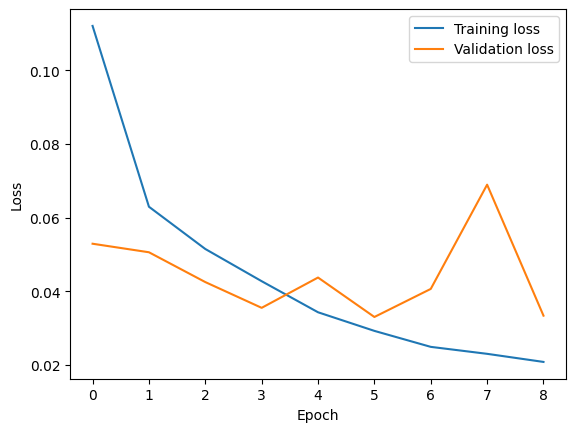

In [ ]:
plt.plot(model.history.history['loss'], label='Training loss')
plt.plot(model.history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

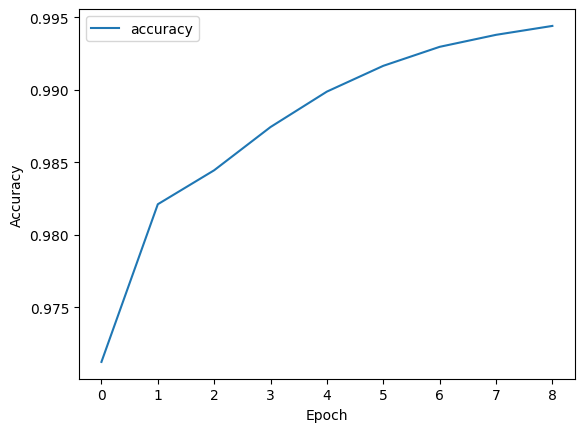

In [ ]:
plt.plot(model.history.history['accuracy'] , label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/NLP/model_nlp.keras')

In [28]:
X_test_sequences

array([[ 1002,    84,   338,   526,  1672, 21700,   104,     1,     2,
         2407,   922,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]], dtype=int32)

In [33]:
y_test_pre = model.predict(X_test_sequences)

5248/5248 [==============================] - 32s 6ms/step


In [52]:
x = list()
for i in y_test_pre:
  x.append(np.argmax(i))

In [54]:
x = np.array(x)


In [46]:
y_test_arr = y_test.values

In [56]:
from sklearn.metrics import mean_absolute_error
label_pre = mean_absolute_error(y_test_arr,x)

In [57]:
label_pre

0.016502790168601223

In [68]:
def du_doan(text , num_max = 45):
  text_1 = [text]
  x_seqen = token.texts_to_sequences(text_1)
  x_seqen = pad_sequences(x_seqen, maxlen=num_max, padding = 'post')
  y_pre = np.argmax(model.predict(x_seqen))
  label_1 = le.inverse_transform([y_pre])
  return label_1

du_doan("it's really evil")

1/1 [==============================] - 0s 31ms/step


array(['neutral'], dtype=object)

In [70]:
df['Emotion'].unique()

array(['hate', 'neutral', 'anger', 'love', 'worry', 'relief', 'happiness',
       'fun', 'empty', 'enthusiasm', 'sadness', 'surprise', 'boredom'],
      dtype=object)